In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import statsmodels.api as sm

# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

import matplotlib.pyplot as plt
from seaborn import histplot, scatterplot, heatmap

# import as usual
#import functions

In [4]:
neo2 = pd.read_csv('data/neo_V2.csv')
neo2.shape

(90836, 10)

In [7]:
neo = pd.read_csv('data/neo.csv')
neo.shape

(90836, 10)

In [18]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [19]:
neo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [13]:
neo2.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [14]:
neo.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [15]:
neo2.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [16]:
neo.describe

<bound method NDFrame.describe of              id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body

In [17]:
neo2.describe

<bound method NDFrame.describe of              id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body

C:\Users\monke\AppData\Local\Temp\ipykernel_30756\1730139887.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((neo2).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)


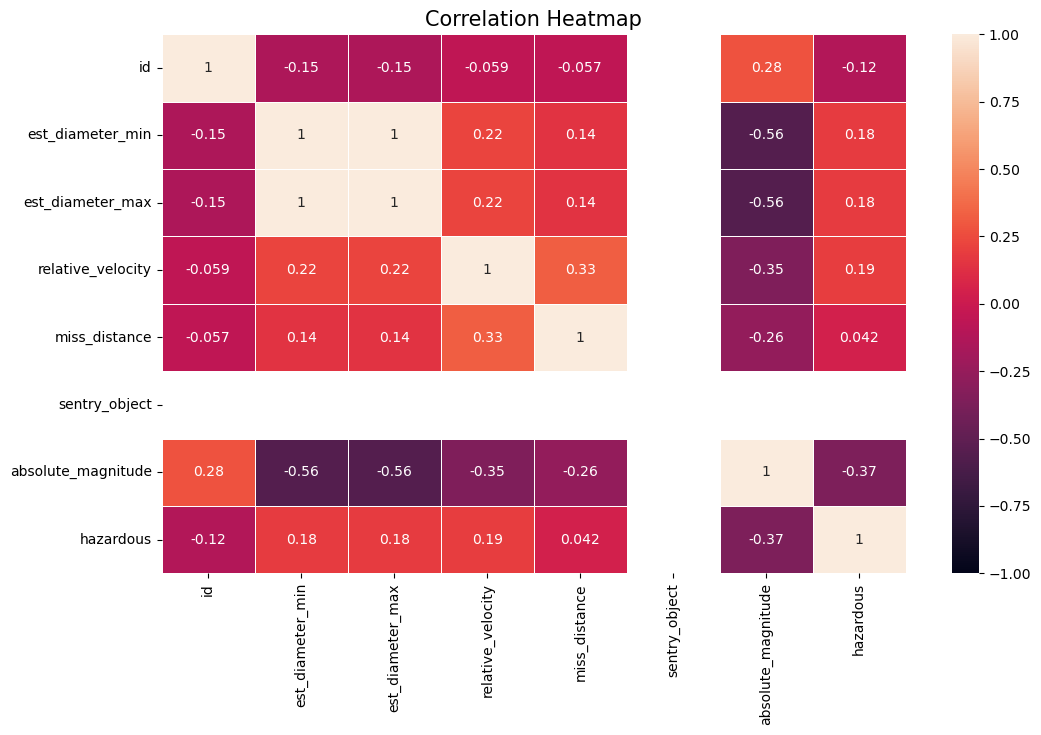

In [12]:
plt.figure(figsize = (12, 7))
sns.heatmap((neo2).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

C:\Users\monke\AppData\Local\Temp\ipykernel_30756\115281925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((neo).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)


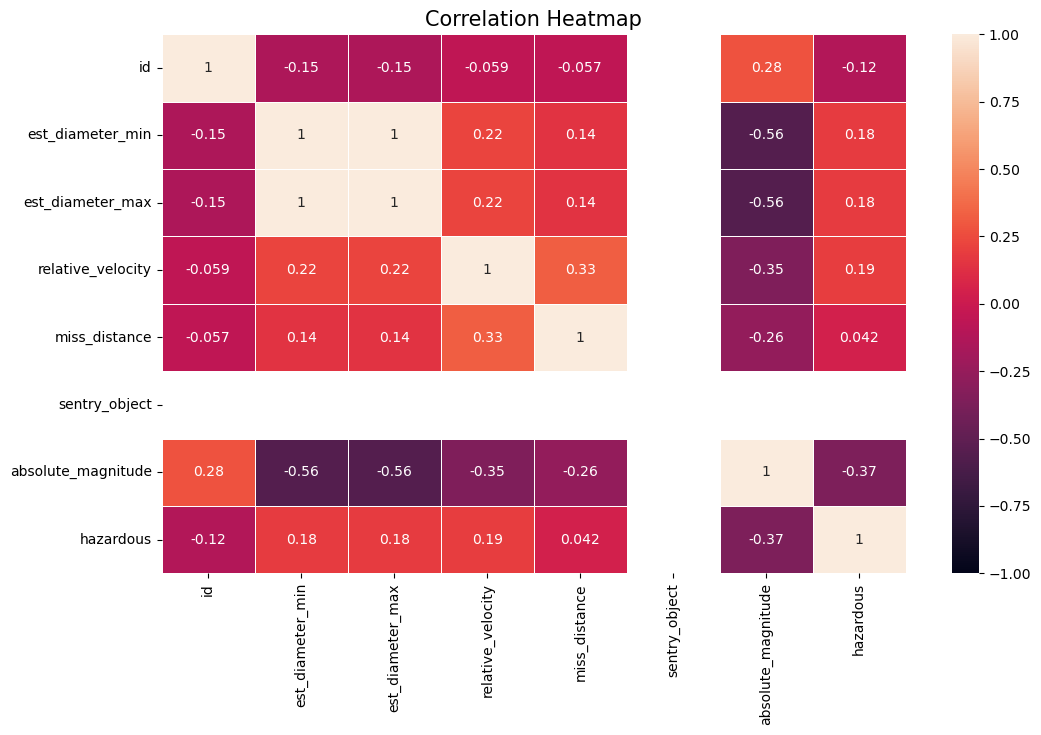

In [11]:
plt.figure(figsize = (12, 7))
sns.heatmap((neo).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()